In [ ]:
!kaggle datasets download -d abdallahwagih/spam-emails

Dataset URL: https://www.kaggle.com/datasets/abdallahwagih/spam-emails
License(s): apache-2.0
spam-emails.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip spam-emails.zip

Archive:  spam-emails.zip
replace spam.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import pandas as pd
df=pd.read_csv('/content/spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.isna().sum()

,0
Category,0
Message,0


In [ ]:
df['Category'] = df['Category'].map({'spam': 1, 'ham': 0})

In [ ]:
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
df.duplicated().sum()

415

In [ ]:
df.drop_duplicates(inplace=True)

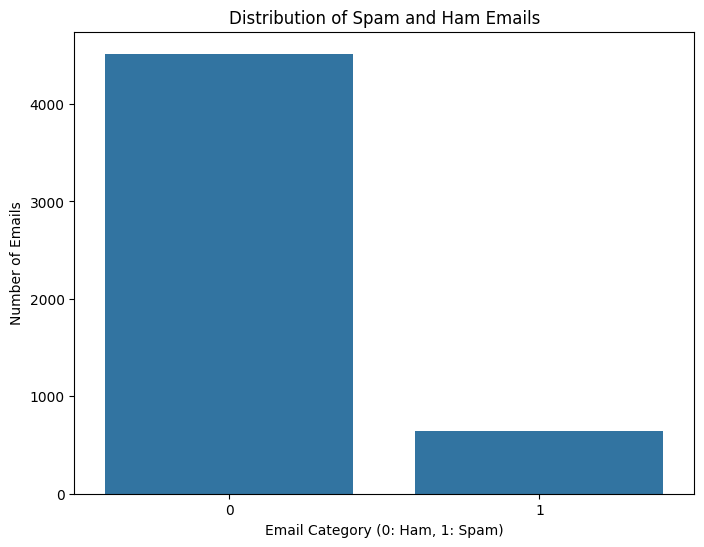

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=df)
plt.title('Distribution of Spam and Ham Emails')
plt.xlabel('Email Category (0: Ham, 1: Spam)')
plt.ylabel('Number of Emails')
plt.show()


In [ ]:
df['Category'].value_counts()

,count
Category,
0,4516
1,641


In [ ]:
data=df.copy()
data

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def count_digits(text):
  return sum(c.isdigit() for c in text)

data['digit_count'] = data['Message'].apply(count_digits)

spam_df = data[data['Category'] == 1]
ham_df = data[data['Category'] == 0]

spam_digit_percentage = (spam_df['digit_count'].sum() / spam_df['Message'].apply(len).sum()) * 100
ham_digit_percentage = (ham_df['digit_count'].sum() / ham_df['Message'].apply(len).sum()) * 100

print(f"Percentage of digits in spam emails: {spam_digit_percentage:.2f}%")
print(f"Percentage of digits in ham emails: {ham_digit_percentage:.2f}%")


Percentage of digits in spam emails: 11.18%
Percentage of digits in ham emails: 0.42%


In [ ]:


def clean_text(text):
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
  text = text.lower()
  return text



In [ ]:
# Apply text cleaning to the message column
data['cleaned_message'] = data['Message'].apply(clean_text)
data

,Category,Message,digit_count,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",0,go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,25,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,0,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",0,nah i dont think he goes to usf he lives aroun...
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,21,this is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?,0,will b going to esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",0,pity was in mood for that soany other suggest...
5570,0,The guy did some bitching but I acted like i'd...,0,the guy did some bitching but i acted like id ...


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Tokenization
data['tokenized_message'] = data['cleaned_message'].apply(word_tokenize)

In [ ]:
data

,Category,Message,digit_count,cleaned_message,tokenized_message
0,0,"Go until jurong point, crazy.. Available only ...",0,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,0,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,25,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,0,U dun say so early hor... U c already then say...,0,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,0,"Nah I don't think he goes to usf, he lives aro...",0,nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,21,this is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,..."
5568,0,Will ü b going to esplanade fr home?,0,will b going to esplanade fr home,"[will, b, going, to, esplanade, fr, home]"
5569,0,"Pity, * was in mood for that. So...any other s...",0,pity was in mood for that soany other suggest...,"[pity, was, in, mood, for, that, soany, other,..."
5570,0,The guy did some bitching but I acted like i'd...,0,the guy did some bitching but i acted like id ...,"[the, guy, did, some, bitching, but, i, acted,..."


In [ ]:
!pip install pandas nltk scikit-learn

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
data['tokenized_message'] = data['tokenized_message'].apply(lambda x: [word for word in x if word not in stop_words])
data

,Category,Message,digit_count,cleaned_message,tokenized_message
0,0,"Go until jurong point, crazy.. Available only ...",0,go until jurong point crazy available only in ...,"[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,25,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,0,u dun say so early hor u c already then say,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",0,nah i dont think he goes to usf he lives aroun...,"[nah, dont, think, goes, usf, lives, around, t..."
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,21,this is the 2nd time we have tried 2 contact u...,"[2nd, time, tried, 2, contact, u, u, 750, poun..."
5568,0,Will ü b going to esplanade fr home?,0,will b going to esplanade fr home,"[b, going, esplanade, fr, home]"
5569,0,"Pity, * was in mood for that. So...any other s...",0,pity was in mood for that soany other suggest...,"[pity, mood, soany, suggestions]"
5570,0,The guy did some bitching but I acted like i'd...,0,the guy did some bitching but i acted like id ...,"[guy, bitching, acted, like, id, interested, b..."


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# lemmatization
lemmatizer = WordNetLemmatizer()
data['lemmatized_message'] = data['tokenized_message'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
data

,Category,Message,digit_count,cleaned_message,tokenized_message,lemmatized_message
0,0,"Go until jurong point, crazy.. Available only ...",0,go until jurong point crazy available only in ...,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,25,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,0,u dun say so early hor u c already then say,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",0,nah i dont think he goes to usf he lives aroun...,"[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, go, usf, life, around, though]"
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,21,this is the 2nd time we have tried 2 contact u...,"[2nd, time, tried, 2, contact, u, u, 750, poun...","[2nd, time, tried, 2, contact, u, u, 750, poun..."
5568,0,Will ü b going to esplanade fr home?,0,will b going to esplanade fr home,"[b, going, esplanade, fr, home]","[b, going, esplanade, fr, home]"
5569,0,"Pity, * was in mood for that. So...any other s...",0,pity was in mood for that soany other suggest...,"[pity, mood, soany, suggestions]","[pity, mood, soany, suggestion]"
5570,0,The guy did some bitching but I acted like i'd...,0,the guy did some bitching but i acted like id ...,"[guy, bitching, acted, like, id, interested, b...","[guy, bitching, acted, like, id, interested, b..."


In [ ]:
# Vectorization (TF-IDF)
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['cleaned_message'])
print(tfidf_matrix.shape)

(5157, 9537)


In [ ]:
print(tfidf_matrix)

  (0, 9035)	0.18514685527957478
  (0, 1179)	0.32403401409703086
  (0, 3873)	0.1516996359907053
  (0, 8348)	0.16168134115447397
  (0, 2229)	0.2733057744672415
  (0, 1889)	0.30919695514151907
  (0, 4889)	0.2733057744672415
  (0, 9283)	0.23310459569683498
  (0, 3913)	0.18199715381482914
  (0, 1891)	0.2733057744672415
  (0, 4438)	0.10799082719274415
  (0, 6089)	0.15876902272090448
  (0, 1417)	0.2503032927412258
  (0, 2513)	0.2503032927412258
  (0, 6497)	0.25282792749102745
  (0, 4728)	0.32403401409703086
  (0, 8775)	0.22746380767613278
  (0, 3816)	0.14691652840184466
  (1, 6083)	0.5462784174488862
  (1, 9175)	0.4302362371491544
  (1, 4696)	0.5231255496976391
  (1, 4928)	0.40672025175587395
  (1, 6049)	0.27819950923475467
  (2, 71)	0.2308545030949371
  (2, 1268)	0.16300221841556678
  :	:
  (5155, 3726)	0.26557305741857423
  (5155, 3124)	0.23508105088753883
  (5155, 7703)	0.19791662141038877
  (5155, 1919)	0.13314012499290223
  (5155, 8818)	0.20647849158651965
  (5155, 2809)	0.18107983910173

In [ ]:
# Display processed data
print(data[['Message', 'cleaned_message', 'tokenized_message', 'lemmatized_message']].head())

                                             Message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                     cleaned_message  \
0  go until jurong point crazy available only in ...   
1                            ok lar joking wif u oni   
2  free entry in 2 a wkly comp to win fa cup fina...   
3        u dun say so early hor u c already then say   
4  nah i dont think he goes to usf he lives aroun...   

                                   tokenized_message  \
0  [go, jurong, point, crazy, available, bugis, n...   
1                     [ok, lar, joking, wif, u, oni]   
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...   
3      [u, dun, say, early, hor, u, c, already, say]   
4  [nah, dont, think, goes, usf, lives, around

In [ ]:
from imblearn.over_sampling import SMOTE

X = tfidf_matrix
y = data['Category']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Original dataset shape:", X.shape, y.shape)
print("Resampled dataset shape:", X_resampled.shape, y_resampled.shape)


Original dataset shape: (5157, 9537) (5157,)
Resampled dataset shape: (9032, 9537) (9032,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



In [ ]:
# Build a Logistic Regression model
model = LogisticRegression()


In [ ]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Make predictions on the validation set
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9833978970669618
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       895
           1       0.99      0.98      0.98       912

    accuracy                           0.98      1807
   macro avg       0.98      0.98      0.98      1807
weighted avg       0.98      0.98      0.98      1807

